# API Data Wrangling with Open-Meteo

In this exercise, we will:

- Fetch historical weather data using the **Open-Meteo API**.
- Parse and clean the data using **pandas**.
- Perform exploratory data analysis.
- Visualize weather trends.

In [2]:
# Install required packages if not already installed
# !pip install requests pandas matplotlib --quiet

In [1]:
# Import Libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Optional: Configure matplotlib for inline display in Jupyter
%matplotlib inline

## Understand the Open-Meteo API

- **API Endpoint**: `https://archive-api.open-meteo.com/v1/archive`
- **Parameters**:
  - `latitude`: Latitude of the location.
  - `longitude`: Longitude of the location.
  - `start_date`: Start date of the data (YYYY-MM-DD).
  - `end_date`: End date of the data (YYYY-MM-DD).
  - `hourly`: Comma-separated list of variables (e.g., temperature, precipitation).
  - `timezone`: Timezone of the data.

**Documentation**: [Open-Meteo API Docs](https://open-meteo.com/en/docs)

In [4]:
# Step 1: Set Up Parameters

# Location coordinates for New York City
latitude = 40.7128
longitude = -74.0060

# Date range
start_date = '2023-01-01'
end_date = '2023-01-07'  # One week of data

# Variables to fetch
hourly_variables = ['temperature_2m', 'relativehumidity_2m', 'precipitation']


In [5]:
# Step 2: Make the API Request

base_url = 'https://archive-api.open-meteo.com/v1/archive'

params = {
    'latitude': latitude,
    'longitude': longitude,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'America/New_York'
}

response = requests.get(base_url, params=params)


In [6]:
# Check if the request was successful

if response.status_code == 200:
    print('Data fetched successfully!')
else:
    print(f'Failed to fetch data. Status code: {response.status_code}')


Data fetched successfully!


In [6]:
# Step 3: Load Data into pandas DataFrame

data = response.json()
hourly_data = data['hourly']

df = pd.DataFrame(hourly_data)
df.head()


,time,temperature_2m,relativehumidity_2m,precipitation
0,2023-01-01T00:00,10.7,99,1.0
1,2023-01-01T01:00,10.5,99,1.0
2,2023-01-01T02:00,10.4,98,0.1
3,2023-01-01T03:00,10.3,96,0.0
4,2023-01-01T04:00,9.7,95,0.0


In [7]:
# Step 4: Data Cleaning

# Convert 'time' column to datetime
df['time'] = pd.to_datetime(df['time'])

# Set 'time' as the index
df.set_index('time', inplace=True)

# Check for missing values
df.isnull().sum()


temperature_2m         0
relativehumidity_2m    0
precipitation          0
dtype: int64

In [9]:
# Handle missing values (if any)
df.fillna(method='ffill', inplace=True)  # Forward fill


In [10]:
# Step 5: Exploratory Data Analysis

# Summary Statistics
df.describe()

,temperature_2m,relativehumidity_2m,precipitation
count,168.000000,168.000000,168.000000
mean,8.371429,86.422619,0.142857
std,3.495063,12.799933,0.436037
min,0.400000,45.000000,0.000000
25%,5.900000,81.000000,0.000000
50%,8.250000,90.500000,0.000000
75%,11.100000,97.000000,0.000000
max,17.900000,100.000000,3.100000


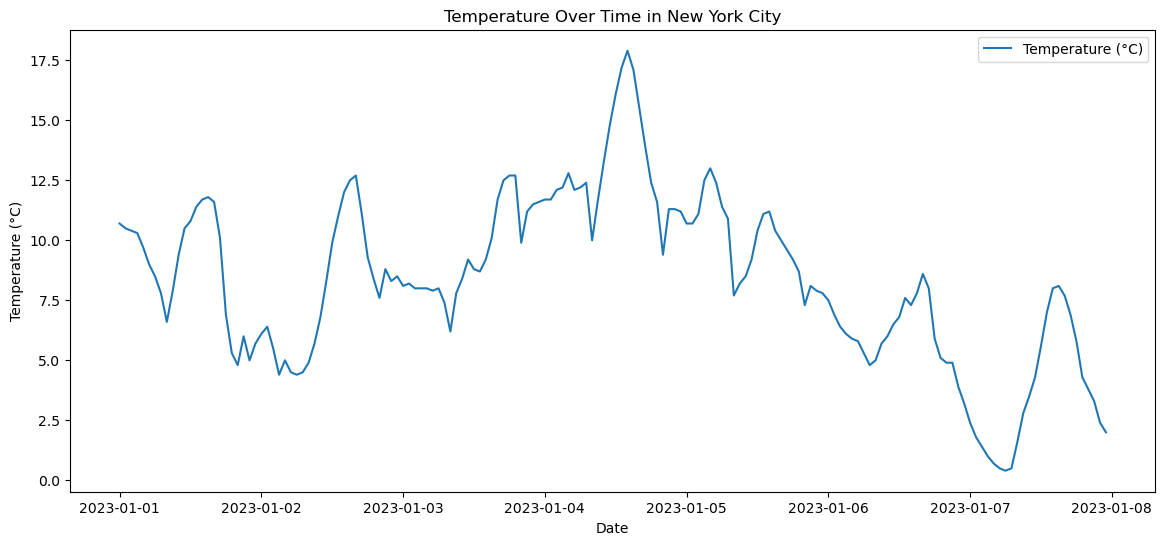

In [11]:
# Plot Temperature Over Time

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['temperature_2m'], label='Temperature (°C)')
plt.title('Temperature Over Time in New York City')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

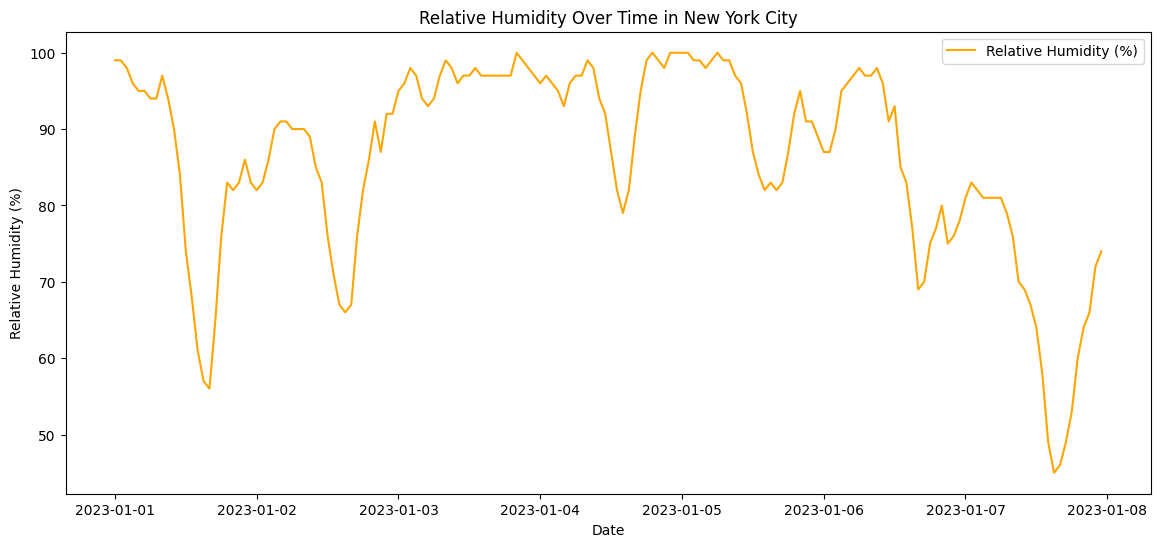

In [12]:
# Plot Relative Humidity Over Time

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['relativehumidity_2m'], color='orange', label='Relative Humidity (%)')
plt.title('Relative Humidity Over Time in New York City')
plt.xlabel('Date')
plt.ylabel('Relative Humidity (%)')
plt.legend()
plt.show()


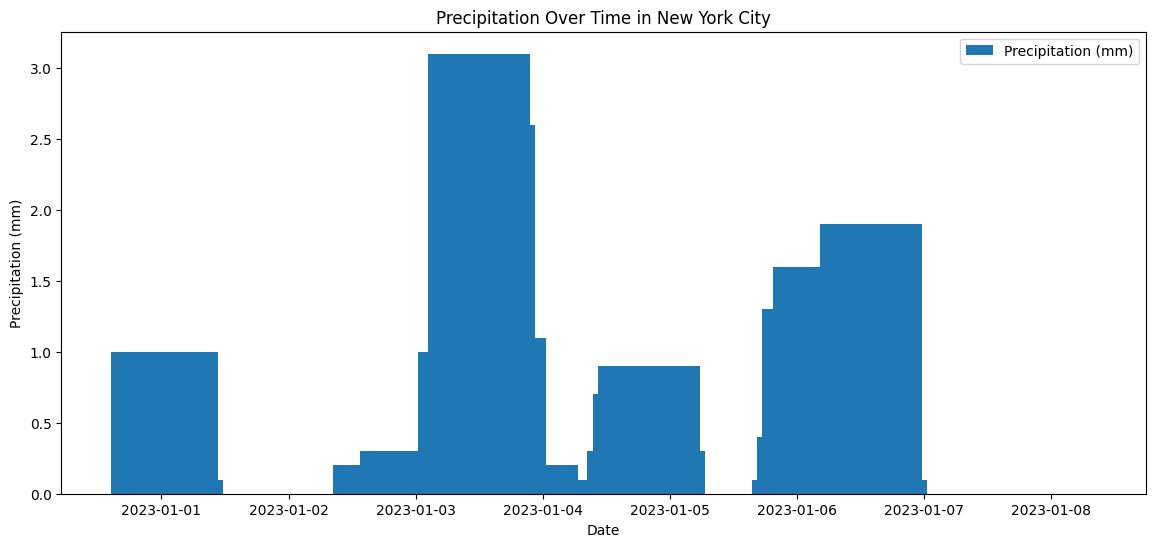

In [13]:
# Plot Precipitation Over Time

plt.figure(figsize=(14, 6))
plt.bar(df.index, df['precipitation'], label='Precipitation (mm)')
plt.title('Precipitation Over Time in New York City')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.show()


In [14]:
# Step 6: Correlation Analysis

# Calculate correlation between temperature and humidity
correlation = df['temperature_2m'].corr(df['relativehumidity_2m'])
print(f'Correlation between Temperature and Relative Humidity: {correlation:.2f}')


Correlation between Temperature and Relative Humidity: 0.24


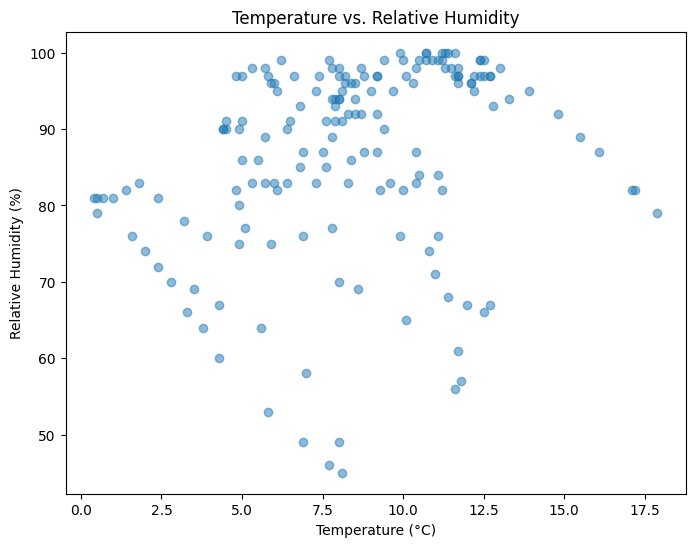

In [15]:
# Scatter Plot of Temperature vs. Relative Humidity

plt.figure(figsize=(8, 6))
plt.scatter(df['temperature_2m'], df['relativehumidity_2m'], alpha=0.5)
plt.title('Temperature vs. Relative Humidity')
plt.xlabel('Temperature (°C)')
plt.ylabel('Relative Humidity (%)')
plt.show()


In [15]:
# Step 7: Resample Data to Daily Averages

daily_avg = df.resample('D').mean()
daily_avg.head()


,temperature_2m,relativehumidity_2m,precipitation
time,,,
2023-01-01,8.850000,83.708333,0.087500
2023-01-02,7.775000,83.458333,0.020833
2023-01-03,9.408333,96.875000,0.395833
2023-01-04,12.995833,94.166667,0.095833
2023-01-05,9.916667,92.666667,0.000000


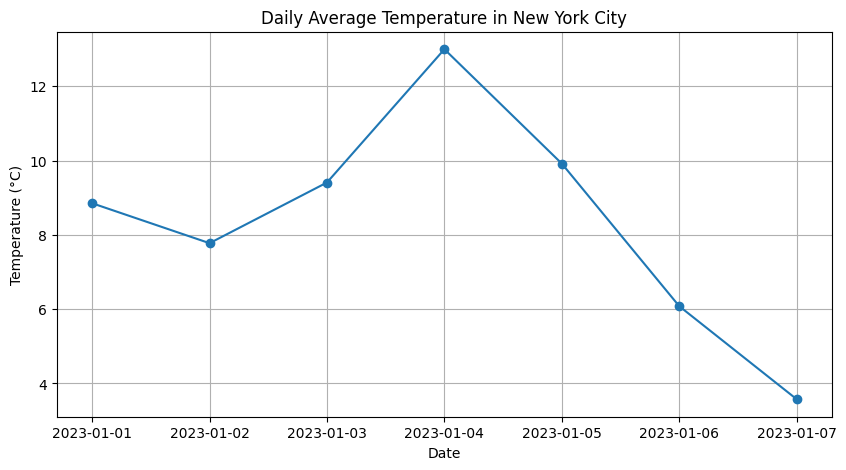

In [17]:
# Plot Daily Average Temperature

plt.figure(figsize=(10, 5))
plt.plot(daily_avg.index, daily_avg['temperature_2m'], marker='o')
plt.title('Daily Average Temperature in New York City')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()


In [12]:
# Step 8: Compare with Another Location (Los Angeles)

# Coordinates for Los Angeles
latitude_la = 34.0522
longitude_la = -118.2437

params_la = {
    'latitude': latitude_la,
    'longitude': longitude_la,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'America/Los_Angeles'
}

response_la = requests.get(base_url, params=params_la)

# Load and clean Los Angeles data
data_la = response_la.json()
hourly_data_la = data_la['hourly']
df_la = pd.DataFrame(hourly_data_la)

df_la['time'] = pd.to_datetime(df_la['time'])
df_la.set_index('time', inplace=True)
df_la.fillna(method='ffill', inplace=True)


In [13]:
# Resample Los Angeles Data to Daily Averages

daily_avg_la = df_la.resample('D').mean()


In [16]:
# Combine DataFrames for Comparison

combined_temp = pd.DataFrame({
    'New York': daily_avg['temperature_2m'],
    'Los Angeles': daily_avg_la['temperature_2m']
})


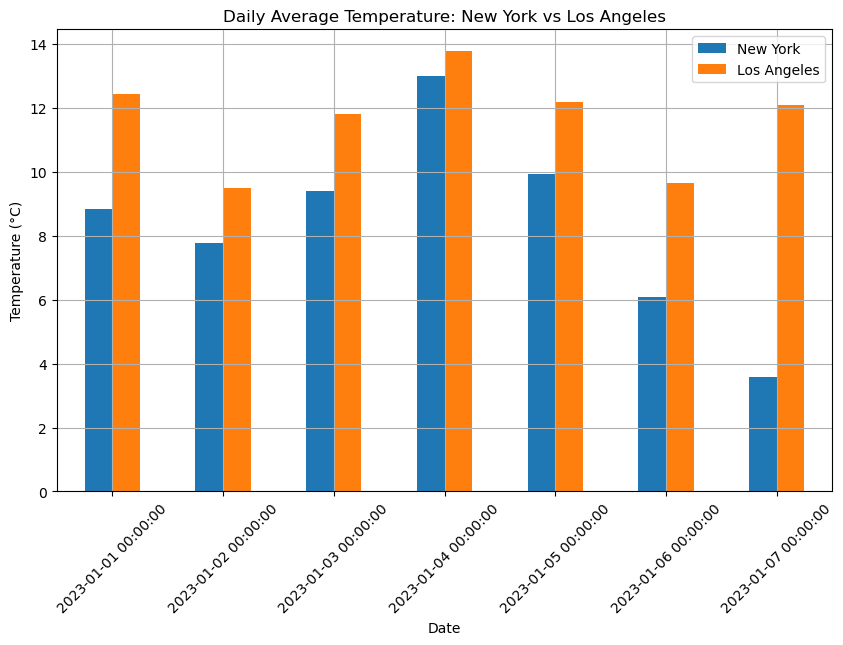

In [17]:
# Plot Comparison of Daily Average Temperature

combined_temp.plot(kind='bar', figsize=(10, 6))
plt.title('Daily Average Temperature: New York vs Los Angeles')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [18]:
# Step 9: Advanced Analysis - Temperature Difference

# Calculate Temperature Difference
combined_temp['Temp Difference'] = combined_temp['Los Angeles'] - combined_temp['New York']
combined_temp


,New York,Los Angeles,Temp Difference
time,,,
2023-01-01,8.850000,12.433333,3.583333
2023-01-02,7.775000,9.483333,1.708333
2023-01-03,9.408333,11.808333,2.400000
2023-01-04,12.995833,13.766667,0.770833
2023-01-05,9.916667,12.183333,2.266667
2023-01-06,6.079167,9.662500,3.583333
2023-01-07,3.575000,12.095833,8.520833


In [19]:
# Step 10: Save Data to CSV (Optional)

# Save New York data
df.to_csv('new_york_weather.csv')

# Save Los Angeles data
df_la.to_csv('los_angeles_weather.csv')


## Conclusion

In this exercise, we:

- Accessed and retrieved data from the **Open-Meteo API**.
- Cleaned and preprocessed JSON data using **pandas**.
- Performed exploratory data analysis and visualization.
- Compared weather patterns between **New York City** and **Los Angeles**.

---

**Next Steps**:

- **Extend the Date Range**: Analyze seasonal trends by fetching data over several months.
- **Fetch Additional Variables**: Include wind speed, atmospheric pressure, or other interesting variables.
- **Forecasting**: Use statistical methods or machine learning models to forecast future weather patterns.
- **Global Analysis**: Compare data from other global cities to gain broader insights.


## Exercises for Students

Now it's your turn! Below are some exercises to reinforce what you've learned. Try to complete them without looking at the solutions.

### Exercise: Compare Rainfall Between London and Seattle

- **Objective**: Compare the total weekly rainfall between London and Seattle over a full year.
- **Tasks**:
  1. **Fetch Data**: Retrieve hourly precipitation data for London and Seattle for the year 2022.
     - **London Coordinates**: Latitude `51.5074`, Longitude `-0.1278`
     - **Seattle Coordinates**: Latitude `47.6062`, Longitude `-122.3321`
  2. **Data Cleaning**: Convert the time columns to datetime objects and set them as the index. Handle any missing values.
  3. **Resample Data**: Resample the hourly data to weekly totals.
  4. **Visualization**: Plot the weekly total precipitation for both cities on the same graph.
  5. **Analysis**: Determine which city had more rainfall overall and identify any interesting patterns.

**Note**: Remember to handle any API limitations, such as data availability or rate limits, and to be mindful of the size of the data you're requesting.

### Tips:

- **API Parameters**: Make sure to adjust the parameters like `latitude`, `longitude`, `start_date`, `end_date`, `hourly`, and `timezone` as needed.
- **Error Handling**: Always check if your API requests are successful before proceeding.
- **Data Storage**: Consider saving your DataFrames to CSV files for future analysis.
- **Visualization**: Customize your plots with titles, labels, legends, and gridlines for better readability.

Happy coding!


## 1. Fetch Data

In [32]:
# Same for both London and Seattle, defining once
# Date range
jan = '2022-01-01'
dec = '2022-12-31'

# Variables 
prec = ['precipitation']

In [55]:
# Coordinates for London and Seattle
london_lat = '51.5074'
london_lon = '-0.1278'

# Set parameters
london_params = {'latitude': london_lat,
         'longitude': london_lon,
          'start_date': jan,
          'end_date': dec,
          'hourly': ','.join(prec),
          'timezone': 'Europe/London'
         }

# API calling
london_response = requests.get(base_url, params = london_params)

# Converting to dataframe
london_data = london_response.json()
hourly_data = london_data['hourly']

london_df = pd.DataFrame(hourly_data)
london_df.head()

,time,precipitation
0,2022-01-01T00:00,0.0
1,2022-01-01T01:00,0.0
2,2022-01-01T02:00,0.0
3,2022-01-01T03:00,0.0
4,2022-01-01T04:00,0.0


In [58]:
# Coordinates for London and Seattle
sea_lat = '47.6062'
sea_lon = '-122.3321'

# Set parameters
sea_params = {'latitude': sea_lat,
         'longitude': sea_lon,
          'start_date': jan,
          'end_date': dec,
          'hourly': ','.join(prec),
          'timezone': 'America/Los_Angeles'
         }

# API calling
sea_response = requests.get(base_url, params = sea_params)

# Converting to dataframe
sea_data = sea_response.json()
hourly_data = sea_data['hourly']

sea_df = pd.DataFrame(hourly_data)
sea_df.head()

,time,precipitation
0,2022-01-01T00:00,0.0
1,2022-01-01T01:00,0.0
2,2022-01-01T02:00,0.0
3,2022-01-01T03:00,0.0
4,2022-01-01T04:00,0.0


## 2. Data Cleaning

In [59]:
london_df['time'] = pd.to_datetime(london_df['time'])
sea_df['time'] = pd.to_datetime(sea_df['time'])

In [60]:
london_df.set_index('time', inplace=True)
london_df.fillna(method='ffill', inplace=True)

In [61]:
sea_df.set_index('time', inplace=True)
sea_df.fillna(method='ffill', inplace=True)

## 3. Resample Data

In [62]:
weekly_avg_london = london_df.resample('W').mean() # This starts from Jan 2nd. 

In [65]:
weekly_avg_london.head()

,precipitation
time,
2022-01-02,0.045833
2022-01-09,0.076786
2022-01-16,0.018452
2022-01-23,0.000000
2022-01-30,0.000595


In [91]:
# Jan 1st, 2022 was a Saturday
weekly_avg_london_sat = london_df.resample('W-SAT').mean()
weekly_avg_london_sat

,precipitation
time,
2022-01-01,0.008333
2022-01-08,0.088690
2022-01-15,0.018452
2022-01-22,0.000000
2022-01-29,0.000595
2022-02-05,0.030357
2022-02-12,0.046429
2022-02-19,0.208929
2022-02-26,0.044643


In [92]:

weekly_avg_sea = sea_df.resample('W-SAT').mean()
weekly_avg_sea.head()


,precipitation
time,
2022-01-01,0.000000
2022-01-08,0.833929
2022-01-15,0.270833
2022-01-22,0.093452
2022-01-29,0.000000


##   4. Visualization

In [123]:
combined_perc = pd.DataFrame({
    'London': weekly_avg_london_sat['precipitation'],
    'Seattle': weekly_avg_sea['precipitation']
})

In [111]:
combined_perc.head()

,London,Seattle
time,,
2022-01-01,0.008333,0.000000
2022-01-08,0.088690,0.833929
2022-01-15,0.018452,0.270833
2022-01-22,0.000000,0.093452
2022-01-29,0.000595,0.000000


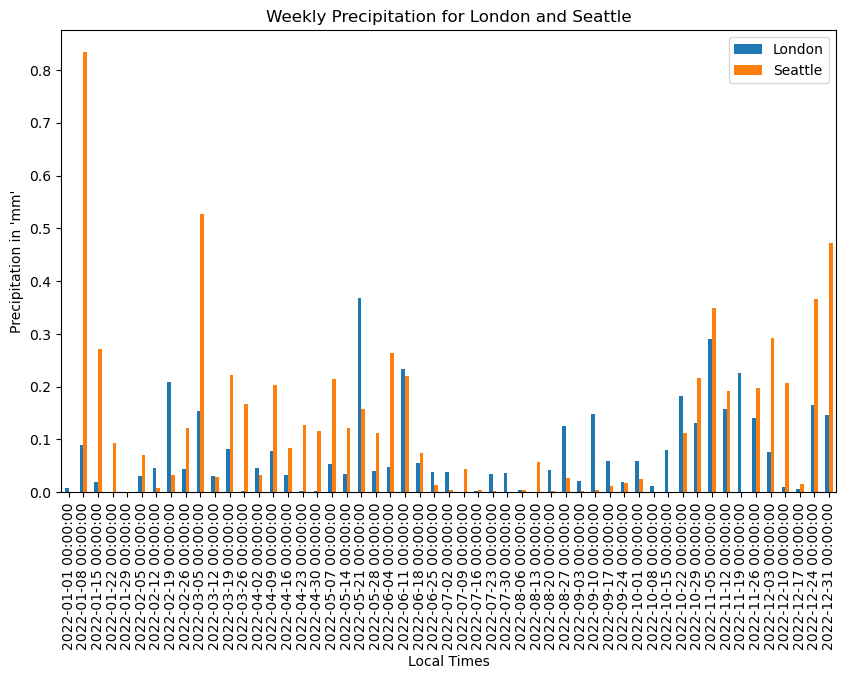

In [114]:
combined_perc.plot(kind = 'bar', figsize = (10,6))
plt.title('Weekly Precipitation for London and Seattle')
plt.xlabel('Local Times')
plt.ylabel("Precipitation in 'mm'")
plt.show();

The x labels are illegible, let's make them prettier. 

In [124]:
combined_perc.reset_index(inplace = True)
combined_perc['time'] = combined_perc['time'].dt.date
combined_perc.set_index('time', inplace = True)

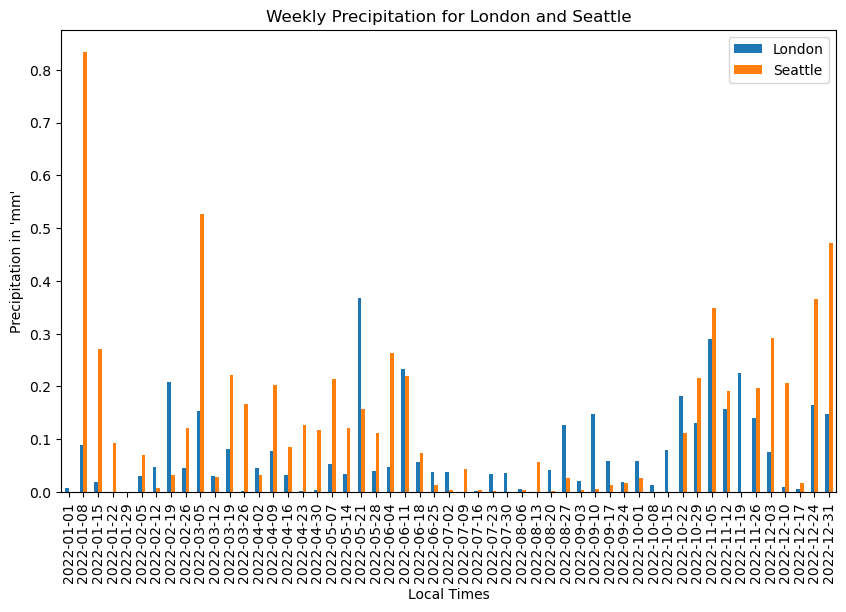

In [125]:
combined_perc.plot(kind = 'bar', figsize = (10,6))
plt.title('Weekly Precipitation for London and Seattle')
plt.xlabel('Local Times')
plt.ylabel("Precipitation in 'mm'")
plt.show();

Seattle has more precipitation compared to London. Let's see if we can visualize it better, and also run some calculations.

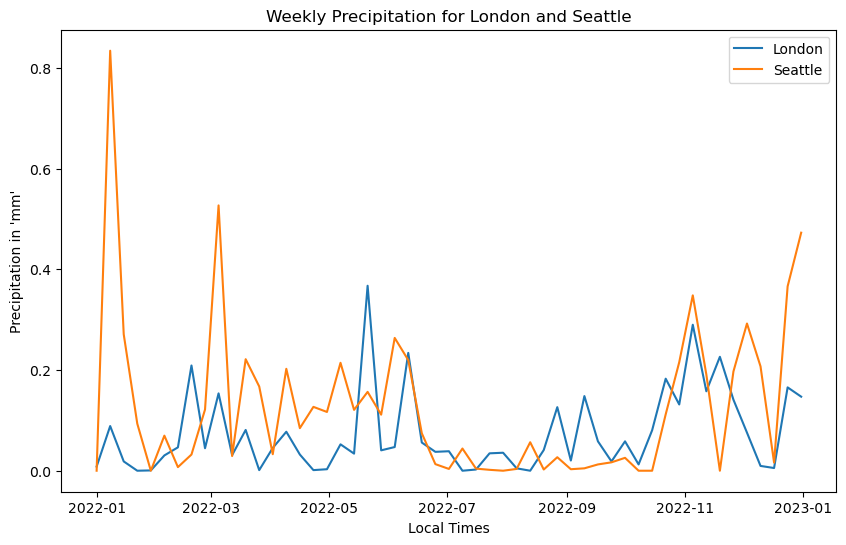

In [126]:
combined_perc.plot(kind = 'line', figsize = (10,6))
plt.title('Weekly Precipitation for London and Seattle')
plt.xlabel('Local Times')
plt.ylabel("Precipitation in 'mm'")
plt.show();

In [152]:
# plotting the difference
combined_perc['diff'] = combined_perc['Seattle'] - combined_perc['London']


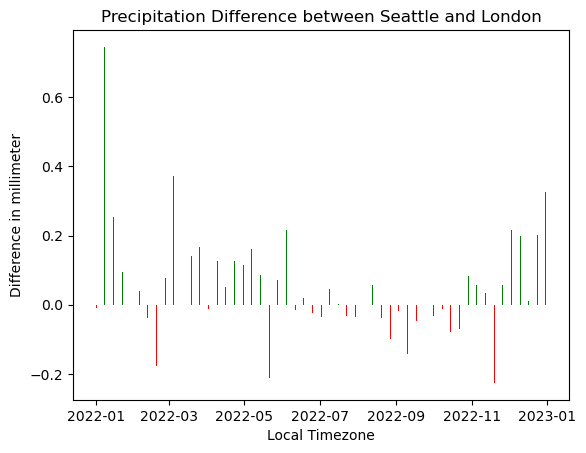

In [130]:
colors = ['green' if x >= 0 else 'red' for x in combined_perc['diff']]

plt.bar(combined_perc.index, combined_perc['diff'], color = colors)
plt.title('Precipitation Difference between Seattle and London')
plt.xlabel('Local Timezone')
plt.ylabel('Difference in millimeter')
plt.show();


This plot shows that in general Seattle has more precipitation than London. But, let's quantify the difference using pandas `describe` method.

In [131]:
combined_perc.describe()

,London,Seattle,diff
count,53.000000,53.000000,53.000000
mean,0.074573,0.127044,0.052471
std,0.081755,0.160912,0.154502
min,0.000000,0.000000,-0.226190
25%,0.018452,0.007143,-0.032738
50%,0.044643,0.074405,0.018452
75%,0.126190,0.202381,0.113690
max,0.367262,0.833929,0.745238


The stats show that the mean precipitation for Seattle is higher than that of London. However, there is something strange here. The standard deviation for both cities is bigger than their means. Let's look at the median.

In [138]:
print('The median precipitation in Seattle in year 2022 is: ', combined_perc['Seattle'].median())
print('The median precipitation in London in year 2022 is: ', combined_perc['London'].median())
print('Seattle showed : ', combined_perc['Seattle'].median() - combined_perc['London'].median(), 'millimeters (on average) more than London in 2022')

The median precipitation in Seattle in year 2022 is:  0.0744047619047619
The median precipitation in London in year 2022 is:  0.044642857142857144
Seattle showed :  0.02976190476190476 millimeters (on average) more than London in 2022


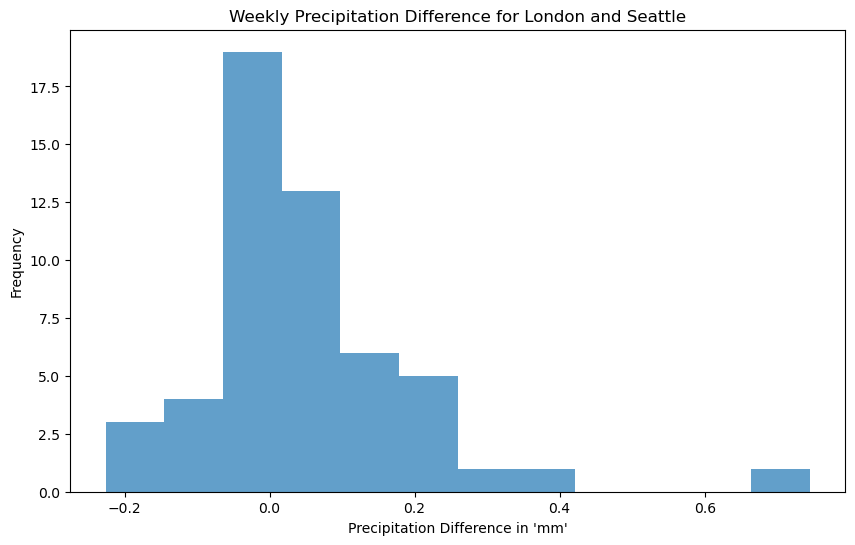

In [155]:
combined_perc['diff'].plot(kind = 'hist', figsize = (10,6), bins = 12, alpha = 0.7)
plt.title('Weekly Precipitation Difference for London and Seattle')
plt.xlabel("Precipitation Difference in 'mm'")
plt.ylabel('Frequency')
plt.show();

In [156]:
combined_perc.drop(columns = ['diff'], axis = 1, inplace = True )

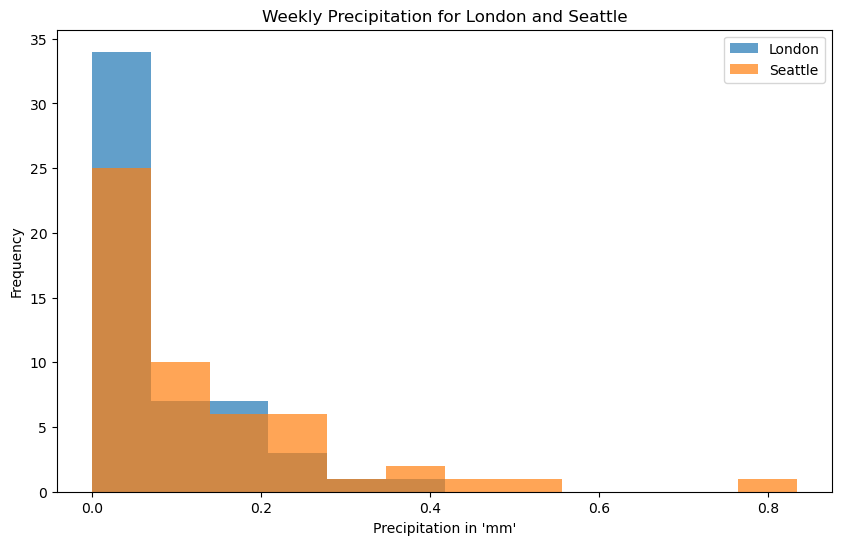

In [157]:
combined_perc.plot(kind = 'hist', figsize = (10,6), bins = 12, alpha = 0.7)
plt.title('Weekly Precipitation for London and Seattle')
plt.xlabel("Precipitation in 'mm'")
plt.ylabel('Frequency')
plt.show();